<a href="https://colab.research.google.com/github/HafizahBaha/Rworkhop_FM/blob/main/Part_II_Workshop_on_R_with_Application_to_Quantitative_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 Finance with R

## Returns

## 4.1 Install the library

In [ ]:
install.packages("quantmod")

In [ ]:
library("quantmod")

## 4.2 Create the data

In [ ]:
my_prices <- c(57, 63, 71, 68, 75, 71, 79)                       # Create example vector
my_prices                                                        # Print example vector

## 4.3 Plot the data

In [ ]:
plot(my_prices, type = "l")

## 4.4 Calculate the returns


In [ ]:
#Manual calculations
vec_return1 <- diff(my_prices) / my_prices[- length(my_prices)]  # Calculate returns
vec_return1                                                      # Print returns

In [ ]:
#Library quantmod
vec_return2 <- Delt(my_prices)                                   # Calculate returns
vec_return2

In [ ]:
#Exercise
#Calculate the returns for a=20.78	20.82	20.7	20.7	20.7	20.7	20.68	20.72	20.5	20.7	20.76	20.8	20.36	20.2	20.02


## Correlation

Refer: http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram

## 5.1 Install library

In [ ]:
##Install library
install.packages("corrplot")

##Call library
library(corrplot)

In [ ]:
install.packages("readxl")
library(readxl)

## 5.2 Import Data

In [ ]:
##Import Data
cor_data <- read_excel("DataCor.xlsx")
cor_data

In [ ]:
##Declare the data as dataframe
as.data.frame(cor_data)

## 5.3 Calculate log returns

In [ ]:

# define a function to find the log returns of closing prices
logreturnf <- function(x) {
  diff(log(x))
}

Additional notes: https://www.geeksforgeeks.org/apply-lapply-sapply-and-tapply-in-r/

In [ ]:
# compute log returns
data_returns <- sapply(cor_data, logreturnf)
head(data_returns)

## 5.4 Calculate correlation

In [ ]:
# Calculate correlation matrix
cor_matrix <- cor(data_returns)
cor_matrix

## 5.5 Plot the correlation

**Visualization methods**
Seven different visualization methods can be used :
“circle”, “square”, “ellipse”, “number”, “shade”, “color”, “pie”.

In [ ]:
corrplot(cor_matrix, method="circle")

In [ ]:
corrplot(cor_matrix, method="square")

**Types of correlogram layout**

There are three types of layout :

“full” (default) : display full correlation matrix

“upper”: display upper triangular of the correlation matrix

“lower”: display lower triangular of the correlation matrix

In [ ]:
corrplot(cor_matrix, type="upper")

## Option Pricing

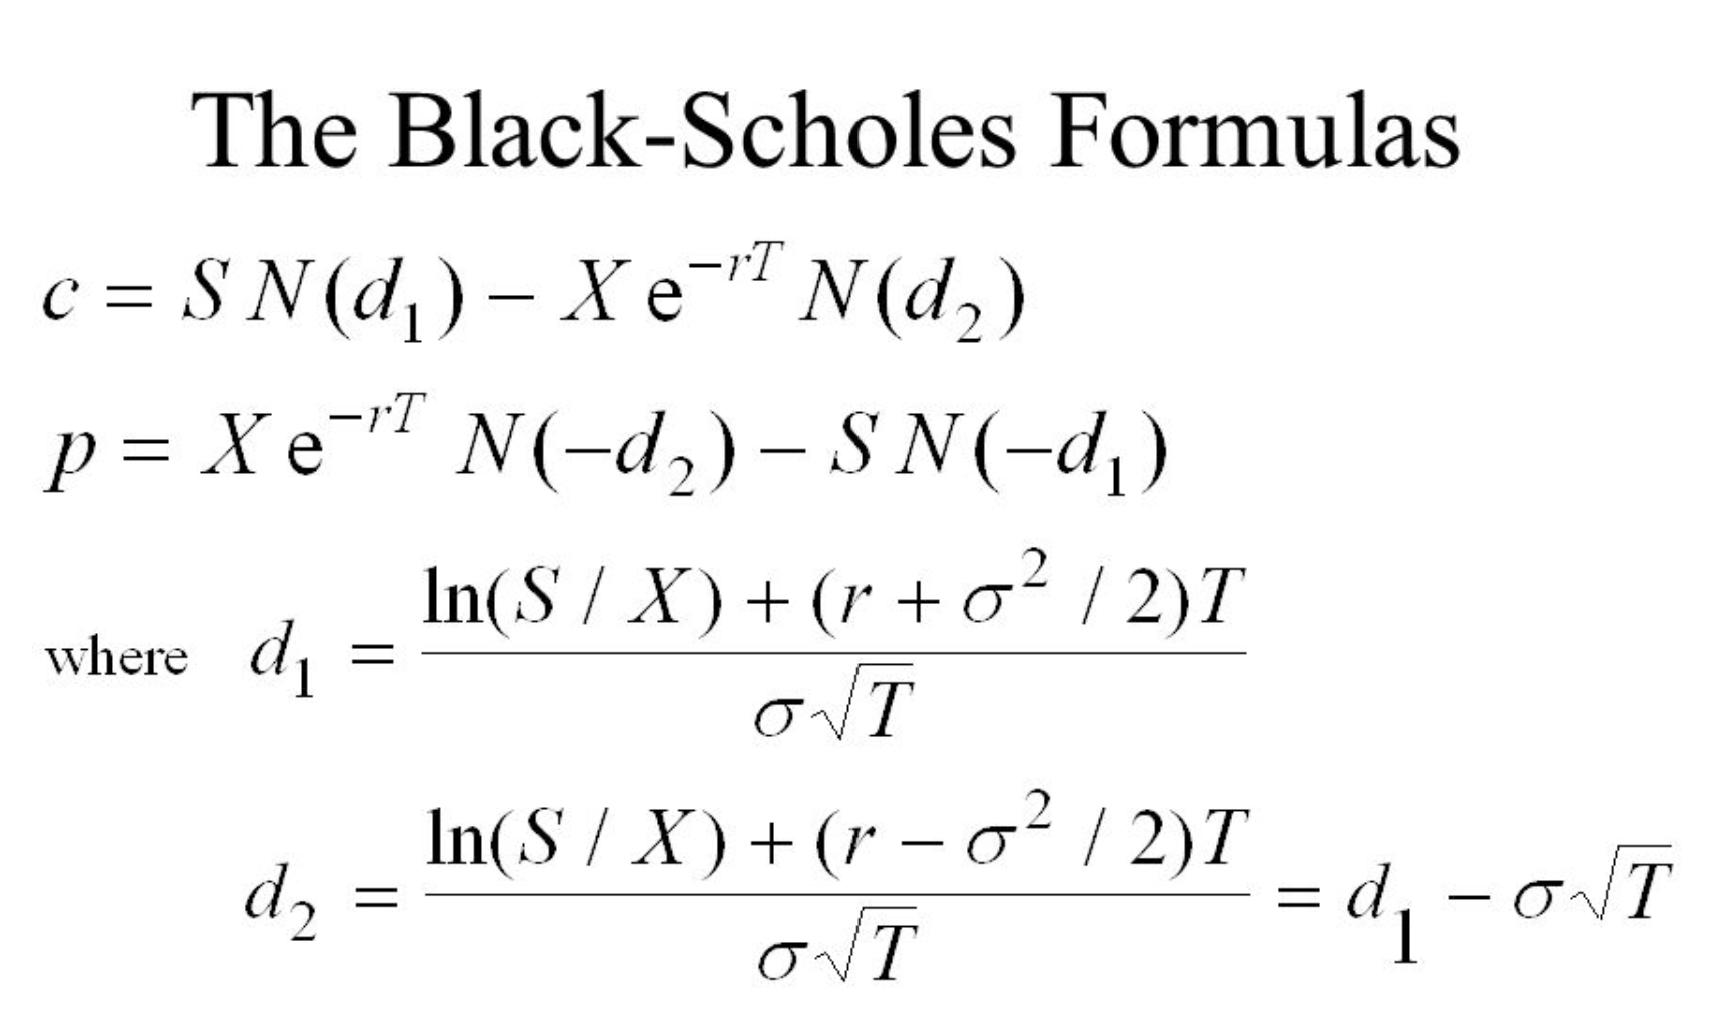

Given the option parameters

* stock_price = 105
* strike_price =100
* volatility = 0.3
* time_to_maturity = 10/365
* interest_rate = 0.03

## 6.1 Calculate using functions

### 6.1.1 Call option

In [ ]:
BlackScholes.Call = function(S, K,sigma,r,q,tau){
d1 = (log(S/K) + (r - q + sigma^2/2)*tau) / (sigma*sqrt(tau))
d2 = d1 - sigma * sqrt(tau)
price = S * exp(-q*tau) * pnorm(d1) - K*exp(-r*tau)*pnorm(d2)
return(price)
}

In [ ]:
BlackScholes.Call(S = 105, K = 100, sigma = 0.3, r = 0.03,
q = 0.01, tau = 10/365)

### 6.1.2 Put option

In [ ]:
BlackScholes.Put = function(S, K,sigma,r,q,tau){
d1 = (log(S/K) + (r - q + sigma^2/2)*tau) / (sigma*sqrt(tau))
d2 = d1 - sigma * sqrt(tau)
price = K*exp(-r*tau)*pnorm(-d2) - S*exp(-q*tau)*pnorm(-d1)
return(price)
}

In [ ]:
BlackScholes.Put(105, 100, 0.3, 0.03, 0.01, 10/365)

In [ ]:
#Exercise: Calculate the call and put option
#stock_price <- 100
#strike_price <- 110
#volatility <- 0.3
#time_to_maturity <- 0.5
#interest_rate <- 0.05